**Import libraries**

In [42]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib_map_utils as mapu # for North Arrow
from matplotlib_scalebar.scalebar import ScaleBar # to draw scalebar
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import rasterio
from rasterio.enums import Resampling
from rasterio.plot import show

**This code converts a PNG image to a TIFF by reading the PNG, extracting its data and metadata, and saving it as a TIFF file.**

In [43]:
# Path to input PNG file
input_png = r"C:\Users\Prabin-PC\OneDrive - Lamar University\Desktop\GIS Final Project\Q1\Image_PNG.png"

# Path to output TIFF file
output_tiff = r'C:\Users\Prabin-PC\OneDrive - Lamar University\Desktop\GIS Final Project\Q1\RasterOutputFinal.tiff'

# Open the PNG file using rasterio
with rasterio.open(input_png) as src:
    # Read the image data
    image_data = src.read(1)  # Read the first band if it's a grayscale image
    # Save the data to a TIFF
    profile = src.profile  # Use the PNG's metadata as a base
    with rasterio.open(output_tiff, 'w', **profile) as dst:
        dst.write(image_data, 1)  # Write data to the first band

print(f"Converted PNG to TIFF: {output_tiff}")


C:\Users\Prabin-PC\anaconda3\Lib\site-packages\rasterio\__init__.py:367: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\Prabin-PC\anaconda3\Lib\site-packages\rasterio\__init__.py:377: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


Converted PNG to TIFF: C:\Users\Prabin-PC\OneDrive - Lamar University\Desktop\GIS Final Project\Q1\RasterOutputFinal.tiff


**This code opens a TIFF raster file, reads its first band, and plots the data using `matplotlib`. It displays the raster with a "viridis" color map, sets the plot's labels and title, and handles any errors that may occur during the process. The plot visualizes the raster's spatial extent with X and Y coordinates.**

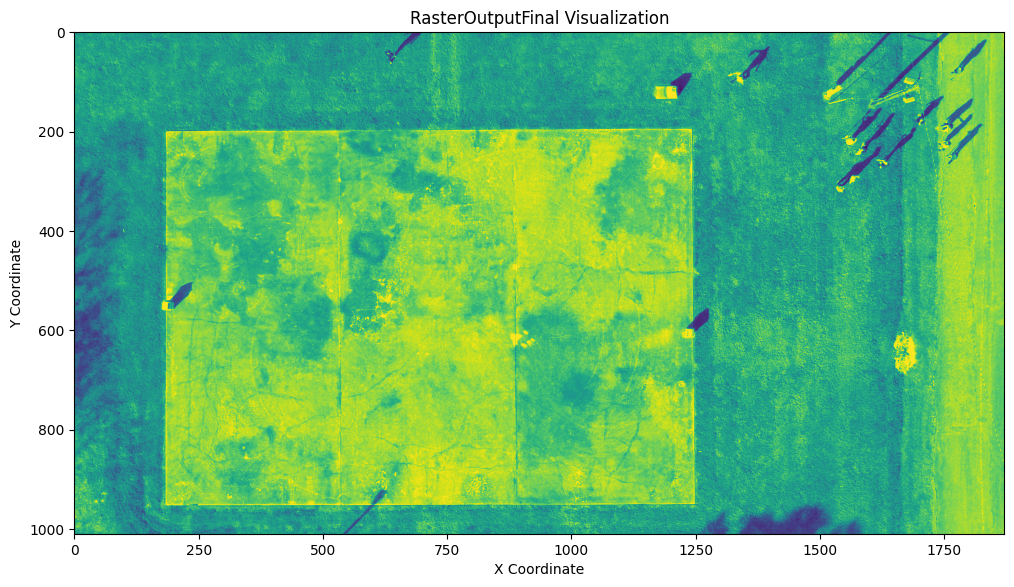

In [44]:
# Path to the raster file
output_tiff = r'C:\Users\Prabin-PC\OneDrive - Lamar University\Desktop\GIS Final Project\Q1\RasterOutputFinal.tiff'

# Open the raster file and plot it
try:
    with rasterio.open(output_tiff) as src:
        # Read the first band
        raster_data = src.read(1)
        raster_extent = [
            src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top
        ]
        
        # Initialize the plot
        fig, ax = plt.subplots(figsize=(12, 10))
        
        # Plot the raster image using imshow
        ax.imshow(raster_data, cmap="viridis", extent=raster_extent, aspect='equal')
        
        # Set plot details
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.set_title("RasterOutputFinal Visualization")
        
        # Show the plot
        plt.show()
except Exception as e:
    print(f"Failed to open or plot raster: {e}")


**Set working directory**

In [45]:
path = r"C:\Users\Prabin-PC\OneDrive - Lamar University\Desktop\GIS Final Project\Q1"
os.chdir(path)

**This code loads a CSV file into a DataFrame and displays the first few rows.**

In [46]:
# Import files
fname = 'Trimble_Final_Data.csv'

a = pd.read_csv(fname)

a.head()

,Img_Label,X,Y,Z,Hor_Accuracy,Ver_Accuracy,Remarks
0,A,396103.8633,3323564.158,4.425630,0.10,0.10,Concrete Top Left
1,B,396136.7596,3323564.703,4.492191,0.10,0.10,Concrete Top Right
2,C,396136.4109,3323541.640,5.300878,0.23,0.22,Concrete Bottom Right
3,D,396103.5592,3323540.882,4.571488,0.13,0.15,Concrete Bottom Left
4,F1,396123.5924,3323552.059,4.698696,0.10,0.10,Field Point 1


**This code creates a `GeoDataFrame` from the DataFrame `a` by converting the longitude (`X`) and latitude (`Y`) columns into point geometries. It then sets the coordinate reference system (CRS) to EPSG:26915 and displays the first few rows of the updated `GeoDataFrame`.**

In [47]:
# Create a point object
# Create a geometry column from the longitude and latitude columns
a = gpd.GeoDataFrame(a, geometry=gpd.points_from_xy(a.X, a.Y))

# Set the coordinate reference system (CRS) if you know it
a.crs = 'EPSG:26915'
a.head()

,Img_Label,X,Y,Z,Hor_Accuracy,Ver_Accuracy,Remarks,geometry
0,A,396103.8633,3323564.158,4.425630,0.10,0.10,Concrete Top Left,POINT (396103.863 3323564.158)
1,B,396136.7596,3323564.703,4.492191,0.10,0.10,Concrete Top Right,POINT (396136.76 3323564.703)
2,C,396136.4109,3323541.640,5.300878,0.23,0.22,Concrete Bottom Right,POINT (396136.411 3323541.64)
3,D,396103.5592,3323540.882,4.571488,0.13,0.15,Concrete Bottom Left,POINT (396103.559 3323540.882)
4,F1,396123.5924,3323552.059,4.698696,0.10,0.10,Field Point 1,POINT (396123.592 3323552.059)


**The code generates a map with the geometries from anew, adds a grid, a north arrow, and displays the plot.**

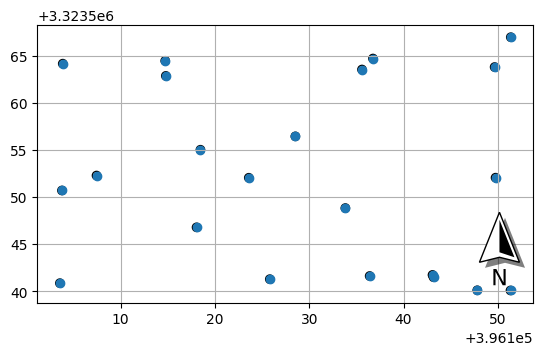

In [48]:
fig,ax = plt.subplots()
anew.plot(ax=ax,facecolor='none',edgecolor='black')
anew.plot(ax=ax)
plt.grid()
mapu.north_arrow.north_arrow(ax=ax, location="lower right", rotation={"degrees":0})
plt.show()

**this code retrieves the x, y, z values from the GeoDataFrame and stores them in separate lists.**

In [49]:
x = list(a.geometry.x)
y = list(a.geometry.y)
z = list(a.Z) 

**The code calculates the bounding box of Jefferson County from the GeoDataFrame a and creates a 1-meter by 1-meter grid within this bounding box. The grid's x and y coordinates are stored in gridx and gridy, respectively.**

In [50]:
delta = 1 # create 1 m x 1 m grid
xmin, ymin, xmax, ymax = a.total_bounds
print(xmin, ymin, xmax,ymax)
gridx = np.arange(xmin,(xmax+delta),delta)
gridy = np.arange(ymin,(ymax+delta),delta)

396103.5592 3323540.109 396151.3764 3323566.964


**The code tests multiple variogram models for Ordinary Kriging, calculates the RMSE for each model, and stores the results. The model with the smallest RMSE will be considered the best fit for the data.**

In [51]:
# Perform ordinary Kriging and select the best variogram
# The best variogram gives minimum root mean sq. error
models = ['linear', 'power', 'gaussian', 'exponential', 'spherical']
varioerr = []
for m in models:
    ok = OrdinaryKriging(x, y, z, variogram_model=m, verbose=False, enable_plotting=False)
    Aspred,ss = ok.execute("grid", x, y)
    err = np.nansum((z-Aspred)**2)
    rmse = np.sqrt(err/len(z))
    varioerr.append(rmse)

**The code tests multiple variogram models for Ordinary Kriging, calculates the RMSE for each model, and stores the results. The model with the smallest RMSE will be considered the best fit for the data.**

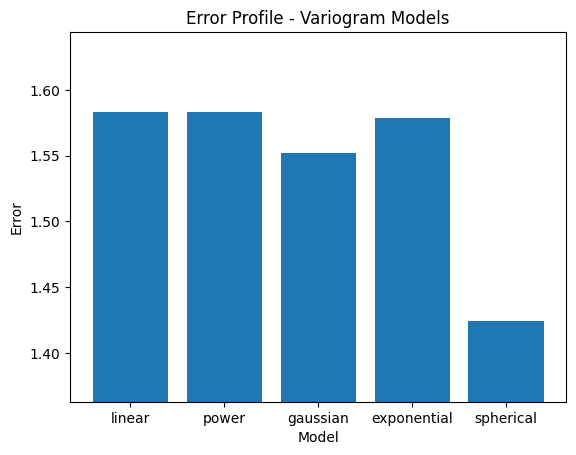

In [52]:
# Calculate the limits for the plot
minlim = np.min(varioerr) - np.std(varioerr)  # Min limit
maxlim = np.max(varioerr) + np.std(varioerr)  # Max limit

# Create the bar plot of errors
plt.bar(models, varioerr)
plt.ylim(minlim, maxlim)  # Set the y-axis limits

# Label the axes and title
plt.ylabel('Error')
plt.xlabel('Model')
plt.title('Error Profile - Variogram Models')

# Show the plot
plt.show()


**The code performs Ordinary Kriging using the spherical variogram model to predict values across a grid. It extracts key variogram information like the lags, semivariance, and model parameters (sill, range, nugget) that characterize the spatial variability of the data.**

In [53]:
# Step 3: Perform ordinary kriging with Spherical Model (best fit model)
ok = OrdinaryKriging(
    x, y, z,
    variogram_model='spherical',  # Automatically fits a spherical model
    verbose=True,
    enable_plotting=False
)

# Make predictions on the grid
z_pred, ss_pred = ok.execute('grid', gridx, gridy)

# Step 4: Extract variogram information
lags = ok.lags  # Distance bins
semivariance = ok.semivariance  # Computed semivariance values

# Step 5: Compute theoretical variogram values
# Extract model parameters
model_parameters = ok.variogram_model_parameters
sill = model_parameters[0]
range_ = model_parameters[1]
nugget = model_parameters[2]

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'spherical' Variogram Model
Partial Sill: 0.04978331378624068
Full Sill: 0.12042053827424151
Range: 4.956180964348426
Nugget: 0.07063722448800083 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



**This code defines a spherical variogram model, computes its values based on the observed data, and plots the empirical semi-variogram alongside the theoretical spherical model. The comparison allows you to assess how well the model fits the data. The plot displays the empirical values (blue) against the theoretical values (red) for the lag distances.**

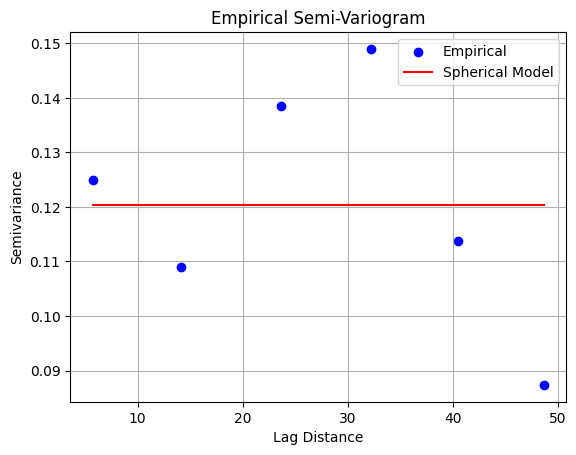

In [54]:
def spherical_variogram(h, sill, range_, nugget):
    h = np.array(h)
    gamma = np.zeros_like(h)
    mask = h <= range_
    gamma[mask] = nugget + sill * (1.5 * (h[mask] / range_) - 0.5 * (h[mask] / range_) ** 3)
    gamma[~mask] = nugget + sill
    return gamma

theoretical_variogram = spherical_variogram(lags, sill, range_, nugget)


# Extract variogram information for plotting
lags = ok.lags  # Distance bins
semivariance = ok.semivariance  # Computed semivariance values

# Step 6: Plot the empirical semi-variogram and theoretical model
plt.figure()
plt.scatter(lags, semivariance, color='blue', label='Empirical')
plt.plot(lags, theoretical_variogram, color='red', label='Spherical Model')
plt.xlabel('Lag Distance')
plt.ylabel('Semivariance')
plt.title('Empirical Semi-Variogram')
plt.grid()
plt.legend()
plt.show()

**This code creates a contour plot of the predicted surface elevations obtained via kriging. It overlays a set of data points and adds a north arrow, with a colorbar indicating the elevation values. The plot also includes proper axis labels for the UTM coordinate system. The result is a visual representation of the predicted surface with clear orientation and elevation gradation.**

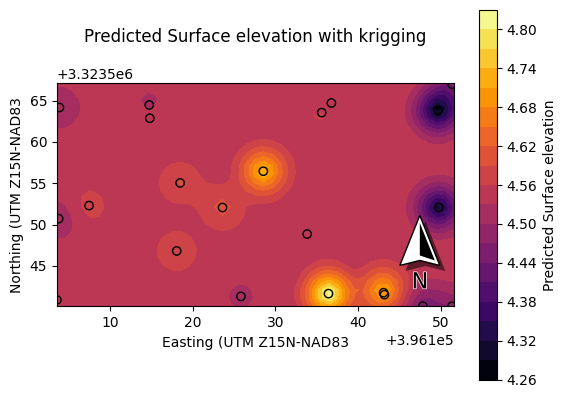

In [55]:
# Step 5: Plot the predicted surface
fig, ax = plt.subplots()
contour = ax.contourf(gridx, gridy, z_pred, levels=20, cmap='inferno')
a.plot(ax=ax,facecolor='none',edgecolor='black')
mapu.north_arrow.north_arrow(ax=ax, location="lower right", rotation={"degrees":0})
plt.colorbar(contour, label='Predicted Surface elevation')
plt.title('Predicted Surface elevation with krigging',pad=30)
plt.xlabel('Easting (UTM Z15N-NAD83')
plt.ylabel('Northing (UTM Z15N-NAD83')
plt.show()

**This code generates a contour plot showing the prediction standard error for surface elevation estimates made through kriging. It includes overlays of the original data points, a north arrow for orientation, a scale bar for distance measurement, and a color bar to indicate the level of standard error across the predicted surface. The final plot helps visualize spatial uncertainty in the predicted surface.**

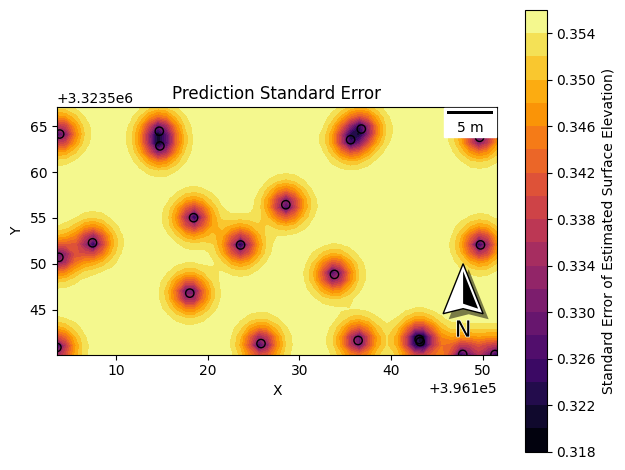

In [56]:
# Step 6: Plot the prediction standard error
fig, ax = plt.subplots()
contour = ax.contourf(gridx, gridy, np.sqrt(ss_pred), levels=20, cmap='inferno')
a.plot(ax=ax,facecolor='none',edgecolor='black')
mapu.north_arrow.north_arrow(ax=ax, location="lower right", rotation={"degrees":0})
scalebar = ScaleBar(0.001, "km")  
ax.add_artist(scalebar)
plt.colorbar(contour, label='Standard Error of Estimated Surface Elevation)')
plt.title('Prediction Standard Error')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

**The map will show the prediction standard error with a red dot marking the location where the model's accuracy is the best (i.e., the standard error is the smallest).**

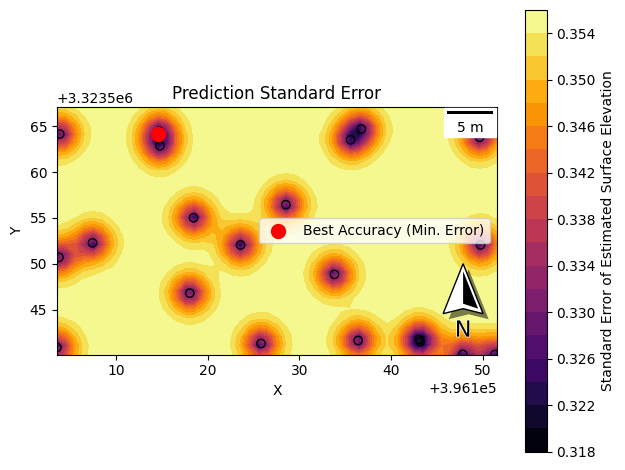

In [57]:
# Step 6: Plot the prediction standard error
fig, ax = plt.subplots()
contour = ax.contourf(gridx, gridy, np.sqrt(ss_pred), levels=20, cmap='inferno')

# Plot the original data points
a.plot(ax=ax, facecolor='none', edgecolor='black')

# Add a north arrow
mapu.north_arrow.north_arrow(ax=ax, location="lower right", rotation={"degrees":0})

# Add scale bar
scalebar = ScaleBar(0.001, "km")  
ax.add_artist(scalebar)

# Color bar
plt.colorbar(contour, label='Standard Error of Estimated Surface Elevation')

# Title and labels
plt.title('Prediction Standard Error')
plt.xlabel('X')
plt.ylabel('Y')

# Find the coordinates with the lowest standard error
min_error_index = np.unravel_index(np.argmin(np.sqrt(ss_pred)), np.sqrt(ss_pred).shape)
min_error_x = gridx[min_error_index[1]]  # x-coordinate
min_error_y = gridy[min_error_index[0]]  # y-coordinate

# Mark the point with the best accuracy (lowest standard error)
ax.scatter(min_error_x, min_error_y, color='red', marker='o', s=100, label="Best Accuracy (Min. Error)")

# Add a legend
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
